# Visualize fragment coverage on each location

**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config_sing.R")))

You are in singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect 


**Check data**

In [7]:
target = "target_PER1"
fdiry  = file.path(FD_RES, "coverage", target)
fname  = "Input?_perbase.txt"
print(Sys.glob(file.path(fdiry, fname)))

fname  = "Input?_20x_perbase.txt"
print(Sys.glob(file.path(fdiry, fname)))

fname  = "TFX?_DMSO_perbase.txt"
print(Sys.glob(file.path(fdiry, fname)))

fname  = "TFX?_Dex_perbase.txt"
print(Sys.glob(file.path(fdiry, fname)))

[1] "/mount/work/out/proj_combeffect/coverage/target_PER1/Input1_perbase.txt"
[2] "/mount/work/out/proj_combeffect/coverage/target_PER1/Input2_perbase.txt"
[3] "/mount/work/out/proj_combeffect/coverage/target_PER1/Input3_perbase.txt"
[4] "/mount/work/out/proj_combeffect/coverage/target_PER1/Input4_perbase.txt"
[5] "/mount/work/out/proj_combeffect/coverage/target_PER1/Input5_perbase.txt"
[1] "/mount/work/out/proj_combeffect/coverage/target_PER1/Input1_20x_perbase.txt"
[2] "/mount/work/out/proj_combeffect/coverage/target_PER1/Input2_20x_perbase.txt"
[3] "/mount/work/out/proj_combeffect/coverage/target_PER1/Input3_20x_perbase.txt"
[4] "/mount/work/out/proj_combeffect/coverage/target_PER1/Input4_20x_perbase.txt"
[5] "/mount/work/out/proj_combeffect/coverage/target_PER1/Input5_20x_perbase.txt"
[1] "/mount/work/out/proj_combeffect/coverage/target_PER1/TFX2_DMSO_perbase.txt"
[2] "/mount/work/out/proj_combeffect/coverage/target_PER1/TFX3_DMSO_perbase.txt"
[3] "/mount/work/out/proj_combeffect/c

## Import coverage data

In [8]:
### set column types and names
ctypes = c(col_character(), col_integer(), col_integer())
cnames = c("Chrom", "Loc", "Depth")

### set file directory
target = "target_PER1"
fdiry  = file.path(FD_RES, "coverage", target)

### import data from Input
fname  = "Input?_perbase.txt"
lst_input = lapply(Sys.glob(file.path(fdiry, fname)), function(fpath){
    sid = str_remove(basename(fpath), "_perbase.txt")
    dat = read_tsv(
        fpath, 
        col_types = ctypes, 
        col_names = cnames)
    dat$Sample = sid
    return(dat)
})

### import data from Input_20x
fname  = "Input?_20x_perbase.txt"
lst_inp20x = lapply(Sys.glob(file.path(fdiry, fname)), function(fpath){
    sid = str_remove(basename(fpath), "_perbase.txt")
    dat = read_tsv(
        fpath, 
        col_types = ctypes, 
        col_names = cnames)
    dat$Sample = sid
    return(dat)
})

### import data from TFX_DMSO
fname  = "TFX?_DMSO_perbase.txt"
lst_dmso = lapply(Sys.glob(file.path(fdiry, fname)), function(fpath){
    sid = str_remove(basename(fpath), "_perbase.txt")
    dat = read_tsv(
        fpath, 
        col_types = ctypes, 
        col_names = cnames)
    dat$Sample = sid
    return(dat)
})

### import data from TFX_Dex
fname  = "TFX?_Dex_perbase.txt"
lst_dex = lapply(Sys.glob(file.path(fdiry, fname)), function(fpath){
    sid = str_remove(basename(fpath), "_perbase.txt")
    dat = read_tsv(
        fpath, 
        col_types = ctypes, 
        col_names = cnames)
    dat$Sample = sid
    return(dat)
})

**Check**

In [10]:
tmp = lapply(lst_input, function(dat){print(dim(dat))})
tmp = lapply(lst_inp20x, function(dat){print(dim(dat))})
tmp = lapply(lst_dmso, function(dat){print(dim(dat))})
tmp = lapply(lst_dex, function(dat){print(dim(dat))})

[1] 12001     4
[1] 12001     4
[1] 12001     4
[1] 12001     4
[1] 12001     4
[1] 12001     4
[1] 12001     4
[1] 12001     4
[1] 12001     4
[1] 12001     4
[1] 12001     4
[1] 12001     4
[1] 12001     4
[1] 12001     4
[1] 12001     4
[1] 12001     4
[1] 12001     4
[1] 12001     4


## Import library size

In [12]:
### set column types and names
ctypes = c(col_character(), col_character(), col_integer())
#cnames = c("Sample", "Group", "Size")

### set file path
fdiry = file.path(FD_RES, "source")
fname = "library_size.tsv"
fpath = file.path(fdiry, fname)

### import table
dat_lib_size = read_tsv(fpath, col_types = ctypes)
dat_lib_size

Sample,Group,Size
<chr>,<chr>,<dbl>
Input1_20x,Input_20x,371718546
Input1,Input,18666630
Input2_20x,Input_20x,347635732
Input2,Input,20167924
Input3_20x,Input_20x,349994051
Input3,Input,23280988
Input4_20x,Input_20x,413508358
Input4,Input,19003938
Input5_20x,Input_20x,341110487


## Merge and normalize sequence depth

In [28]:
dat = bind_rows(lst_input, lst_inp20x, lst_dmso, lst_dex) %>% 
    left_join(dat_lib_size, by="Sample") %>%
    mutate(
        Depth_Norm = Depth / Size,
        Depth_LogNorm = log(Depth) - log(Size))
head(dat)

Chrom,Loc,Depth,Sample,Group,Size,Depth_Norm,Depth_LogNorm
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chr17,8148000,10,Input1,Input,18666630,5.357153e-07,-14.43966
chr17,8148001,10,Input1,Input,18666630,5.357153e-07,-14.43966
chr17,8148002,10,Input1,Input,18666630,5.357153e-07,-14.43966
chr17,8148003,10,Input1,Input,18666630,5.357153e-07,-14.43966
chr17,8148004,10,Input1,Input,18666630,5.357153e-07,-14.43966
chr17,8148005,10,Input1,Input,18666630,5.357153e-07,-14.43966


## Input

In [51]:
tmp = dat %>% dplyr::filter(Group == "Input")
gpt = ggplot(tmp, aes(x=Loc, y=Depth, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title="Chr17:8148000-8160000", x="Location", y="Depth")
gp1 = gpt

In [52]:
tmp = dat %>% dplyr::filter(Group == "Input")
gpt = ggplot(tmp, aes(x=Loc, y=Depth_Norm, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title="Chr17:8148000-8160000", x="Location", y="Depth / Lib.Size")
gp2 = gpt

In [53]:
tmp = dat %>% dplyr::filter(Group == "Input_20x")
gpt = ggplot(tmp, aes(x=Loc, y=Depth, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title="Chr17:8148000-8160000", x="Location", y="Depth")
gp3 = gpt

In [54]:
tmp = dat %>% dplyr::filter(Group == "Input_20x")
gpt = ggplot(tmp, aes(x=Loc, y=Depth_Norm, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title="Chr17:8148000-8160000", x="Location", y="Depth / Lib.Size")
gp4 = gpt

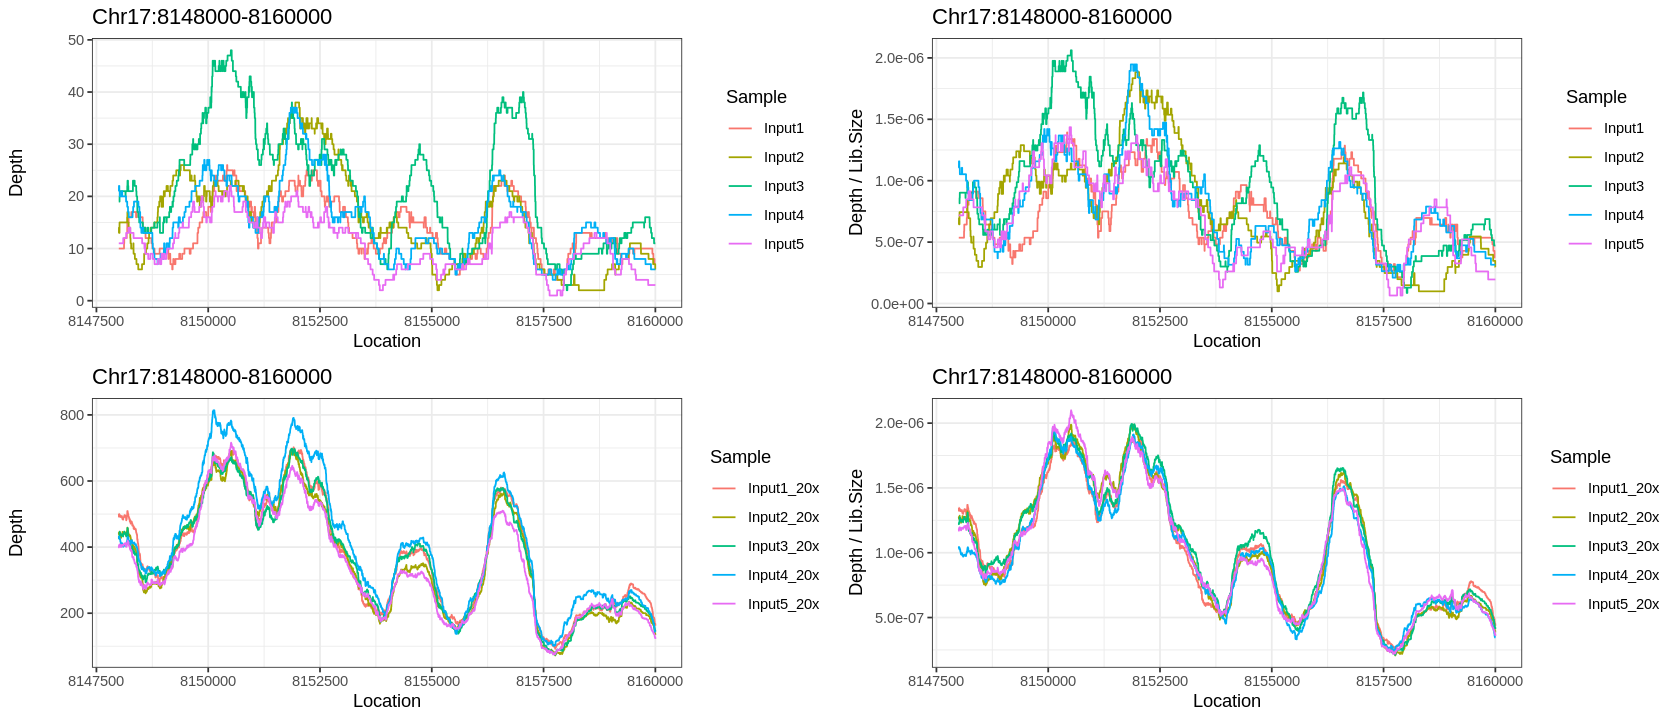

In [55]:
options(repr.plot.height=6, repr.plot.width=14)
plot_grid(gp1, gp2, gp3, gp4, ncol = 2, align = "v")

## Output

In [56]:
tmp = dat %>% dplyr::filter(Group == "TFX_DMSO")
gpt = ggplot(tmp, aes(x=Loc, y=Depth, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title="Chr17:8148000-8160000", x="Location", y="Depth")
gp1 = gpt

In [57]:
tmp = dat %>% dplyr::filter(Group == "TFX_DMSO")
gpt = ggplot(tmp, aes(x=Loc, y=Depth_Norm, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title="Chr17:8148000-8160000", x="Location", y="Depth / Lib.Size")
gp2 = gpt

In [58]:
tmp = dat %>% dplyr::filter(Group == "TFX_Dex")
gpt = ggplot(tmp, aes(x=Loc, y=Depth, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title="Chr17:8148000-8160000", x="Location", y="Depth")
gp3 = gpt

In [59]:
tmp = dat %>% dplyr::filter(Group == "TFX_Dex")
gpt = ggplot(tmp, aes(x=Loc, y=Depth_Norm, color=Sample)) + 
    geom_line() + 
    theme_bw()  +
    labs(title="Chr17:8148000-8160000", x="Location", y="Depth / Lib.Size")
gp4 = gpt

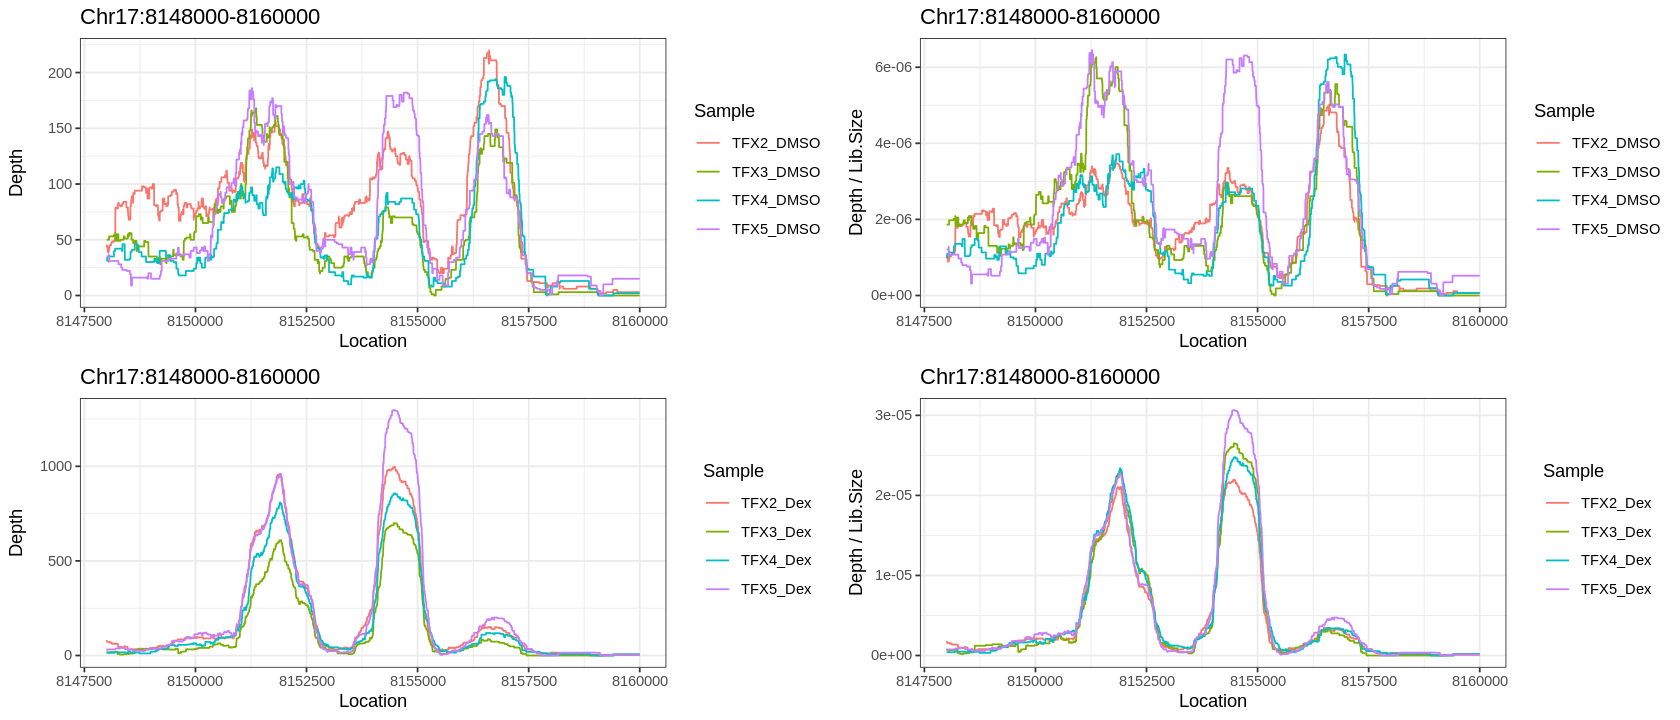

In [60]:
options(repr.plot.height=6, repr.plot.width=14)
plot_grid(gp1, gp2, gp3, gp4, ncol = 2, align = "v")

## Estimate output / input

In [63]:
dat = bind_rows(lst_input, lst_inp20x, lst_dmso, lst_dex) %>% 
    left_join(dat_lib_size, by="Sample") %>%
    mutate(
        Depth_Norm = Depth / Size,
        Depth_LogNorm = log(Depth) - log(Size))
head(dat)

Chrom,Loc,Depth,Sample,Group,Size,Depth_Norm,Depth_LogNorm
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chr17,8148000,10,Input1,Input,18666630,5.357153e-07,-14.43966
chr17,8148001,10,Input1,Input,18666630,5.357153e-07,-14.43966
chr17,8148002,10,Input1,Input,18666630,5.357153e-07,-14.43966
chr17,8148003,10,Input1,Input,18666630,5.357153e-07,-14.43966
chr17,8148004,10,Input1,Input,18666630,5.357153e-07,-14.43966
chr17,8148005,10,Input1,Input,18666630,5.357153e-07,-14.43966


In [66]:
mat = dat %>% 
    dplyr::select(Loc, Depth_Norm, Sample) %>% 
    spread(key=Sample, value=Depth_Norm)
head(mat)

Loc,Input1,Input1_20x,Input2,Input2_20x,Input3,Input3_20x,Input4,Input4_20x,Input5,Input5_20x,TFX2_Dex,TFX2_DMSO,TFX3_Dex,TFX3_DMSO,TFX4_Dex,TFX4_DMSO,TFX5_Dex,TFX5_DMSO
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8148000,5.357153e-07,1.347794e-06,6.445879e-07,1.268569e-06,8.161166e-07,1.220021e-06,1.105034e-06,1.039882e-06,7.177807e-07,1.175572e-06,1.67351e-06,9.807364e-07,6.43923e-07,1.86431e-06,4.047402e-07,1.001566e-06,7.799529e-07,1.212787e-06
8148001,5.357153e-07,1.347794e-06,6.445879e-07,1.274322e-06,8.161166e-07,1.222878e-06,1.105034e-06,1.042301e-06,7.177807e-07,1.178504e-06,1.69553e-06,1.003544e-06,6.43923e-07,1.86431e-06,4.047402e-07,1.001566e-06,7.799529e-07,1.212787e-06
8148002,5.357153e-07,1.345104e-06,6.445879e-07,1.268569e-06,8.161166e-07,1.220021e-06,1.105034e-06,1.039882e-06,7.177807e-07,1.175572e-06,1.69553e-06,1.026352e-06,6.43923e-07,1.86431e-06,4.047402e-07,1.001566e-06,7.799529e-07,1.212787e-06
8148003,5.357153e-07,1.323582e-06,6.445879e-07,1.262816e-06,8.161166e-07,1.225735e-06,1.105034e-06,1.035046e-06,7.177807e-07,1.169709e-06,1.69553e-06,1.003544e-06,6.43923e-07,1.86431e-06,4.047402e-07,1.001566e-06,7.799529e-07,1.212787e-06
8148004,5.357153e-07,1.331653e-06,6.941716e-07,1.271446e-06,8.161166e-07,1.228592e-06,1.157655e-06,1.044719e-06,7.177807e-07,1.181435e-06,1.69553e-06,1.003544e-06,6.43923e-07,1.86431e-06,4.047402e-07,1.001566e-06,7.563179e-07,1.212787e-06
8148005,5.357153e-07,1.337033e-06,6.941716e-07,1.271446e-06,8.161166e-07,1.231450e-06,1.157655e-06,1.042301e-06,7.177807e-07,1.187299e-06,1.69553e-06,1.003544e-06,6.43923e-07,1.86431e-06,4.047402e-07,1.001566e-06,7.090481e-07,1.212787e-06


In [99]:
set.seed(123)
res = apply(mat, 1, function(values){
    ### extract
    p = values["Loc"]
    y = values[c(paste0("TFX",   2:5, "_DMSO"))]
    x = values[c(paste0("Input", 1:5))]
    
    ### bootstrap
    ys = sample(y, size = 1000, replace = TRUE)
    xs = sample(x, size = 1000, replace = TRUE)
    rs = ys / xs
    
    ### stats
    mu  = mean(rs)
    med = median(rs)
    q25 = quantile(rs, probs = 0.25)
    q75 = quantile(rs, probs = 0.75)
    return(c(p, mu, med, q25, q75))
})

### arrange
res = t(res)
res = as.data.frame(res)
colnames(res) = c("Loc", "Mean", "Median", "Q25", "Q75")
res_dmso_inp = res

In [100]:
set.seed(123)
res = apply(mat, 1, function(values){
    ### extract
    p = values["Loc"]
    y = values[c(paste0("TFX",   2:5, "_DMSO"))]
    x = values[c(paste0("Input", 1:5, "_20x"))]
    
    ### bootstrap
    ys = sample(y, size = 1000, replace = TRUE)
    xs = sample(x, size = 1000, replace = TRUE)
    rs = ys / xs
    
    ### stats
    mu  = mean(rs)
    med = median(rs)
    q25 = quantile(rs, probs = 0.25)
    q75 = quantile(rs, probs = 0.75)
    return(c(p, mu, med, q25, q75))
})

### arrange
res = t(res)
res = as.data.frame(res)
colnames(res) = c("Loc", "Mean", "Median", "Q25", "Q75")
res_dmso_inp20x = res

In [101]:
set.seed(123)
res = apply(mat, 1, function(values){
    ### extract
    p = values["Loc"]
    y = values[c(paste0("TFX",   2:5, "_Dex"))]
    x = values[c(paste0("Input", 1:5))]
    
    ### bootstrap
    ys = sample(y, size = 1000, replace = TRUE)
    xs = sample(x, size = 1000, replace = TRUE)
    rs = ys / xs
    
    ### stats
    mu  = mean(rs)
    med = median(rs)
    q25 = quantile(rs, probs = 0.25)
    q75 = quantile(rs, probs = 0.75)
    return(c(p, mu, med, q25, q75))
})

### arrange
res = t(res)
res = as.data.frame(res)
colnames(res) = c("Loc", "Mean", "Median", "Q25", "Q75")
res_dex_inp = res

In [102]:
set.seed(123)
res = apply(mat, 1, function(values){
    ### extract
    p = values["Loc"]
    y = values[c(paste0("TFX",   2:5, "_Dex"))]
    x = values[c(paste0("Input", 1:5, "_20x"))]
    
    ### bootstrap
    ys = sample(y, size = 1000, replace = TRUE)
    xs = sample(x, size = 1000, replace = TRUE)
    rs = ys / xs
    
    ### stats
    mu  = mean(rs)
    med = median(rs)
    q25 = quantile(rs, probs = 0.25)
    q75 = quantile(rs, probs = 0.75)
    return(c(p, mu, med, q25, q75))
})

### arrange
res = t(res)
res = as.data.frame(res)
colnames(res) = c("Loc", "Mean", "Median", "Q25", "Q75")
res_dex_inp20x = res

In [103]:
gp1 = ggplot(res_dmso_inp, aes(x=Loc, y=Median)) + 
    geom_ribbon(aes(ymin=Q25, ymax=Q75), alpha=0.2) +
    geom_line(size=0.5) +
    #geom_point(size=0.01) + 
    theme_bw() +
    labs(x="Location", y="Normalized\nMedian(DMSO / Input)", title="Chr17:8148000-8160000")

gp2 = ggplot(res_dmso_inp20x, aes(x=Loc, y=Median)) + 
    geom_ribbon(aes(ymin=Q25, ymax=Q75), alpha=0.2) +
    geom_line(size=0.5) +
    #geom_point(size=0.01) + 
    theme_bw() +
    labs(x="Location", y="Normalized\nMedian(DMSO / Input_20x)", title="Chr17:8148000-8160000")

gp3 = ggplot(res_dex_inp, aes(x=Loc, y=Median)) + 
    geom_ribbon(aes(ymin=Q25, ymax=Q75), alpha=0.2) +
    geom_line(size=0.5) +
    #geom_point(size=0.01) + 
    theme_bw() +
    labs(x="Location", y="Normalized\nMedian(Dex / Input)", title="Chr17:8148000-8160000")

gp4 = ggplot(res_dex_inp20x, aes(x=Loc, y=Median)) + 
    geom_ribbon(aes(ymin=Q25, ymax=Q75), alpha=0.2) +
    geom_line(size=0.5) +
    #geom_point(size=0.01) + 
    theme_bw() +
    labs(x="Location", y="Normalized\nMedian(Dex / Input_20x)", title="Chr17:8148000-8160000")

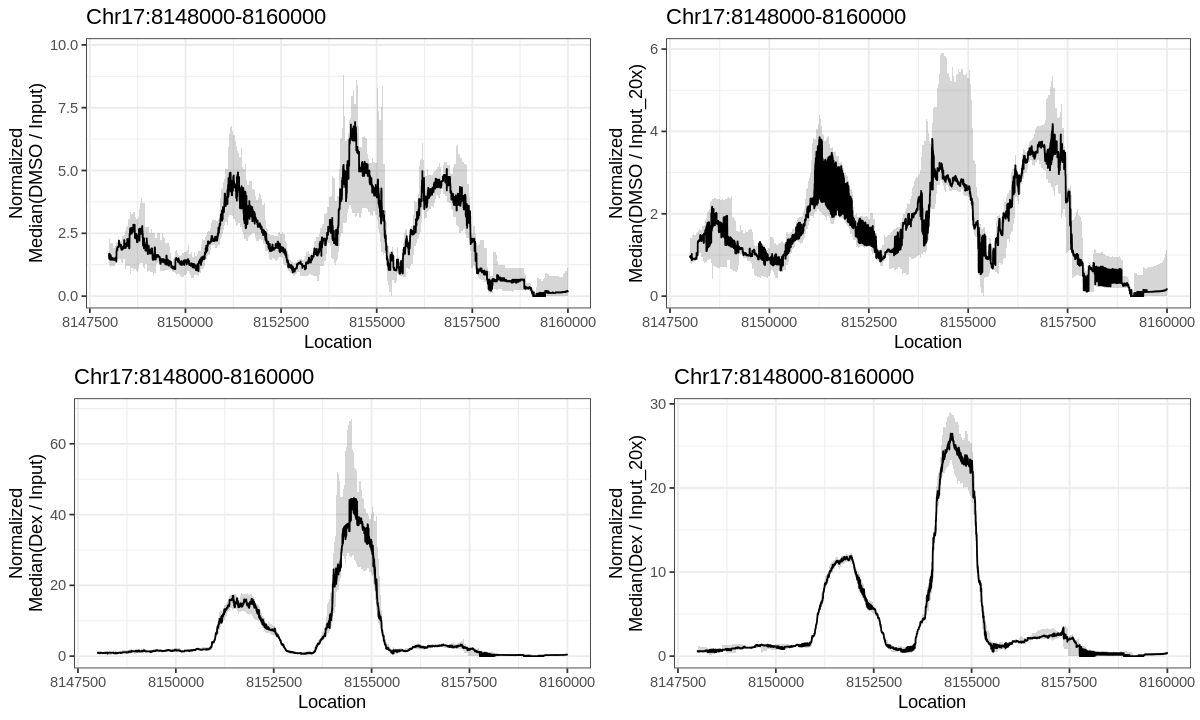

In [104]:
options(repr.plot.height=6, repr.plot.width=10)
grid.arrange(gp1, gp2, gp3, gp4, nrow=2)

Warning message:
“Removed 11950 row(s) containing missing values (geom_path).”


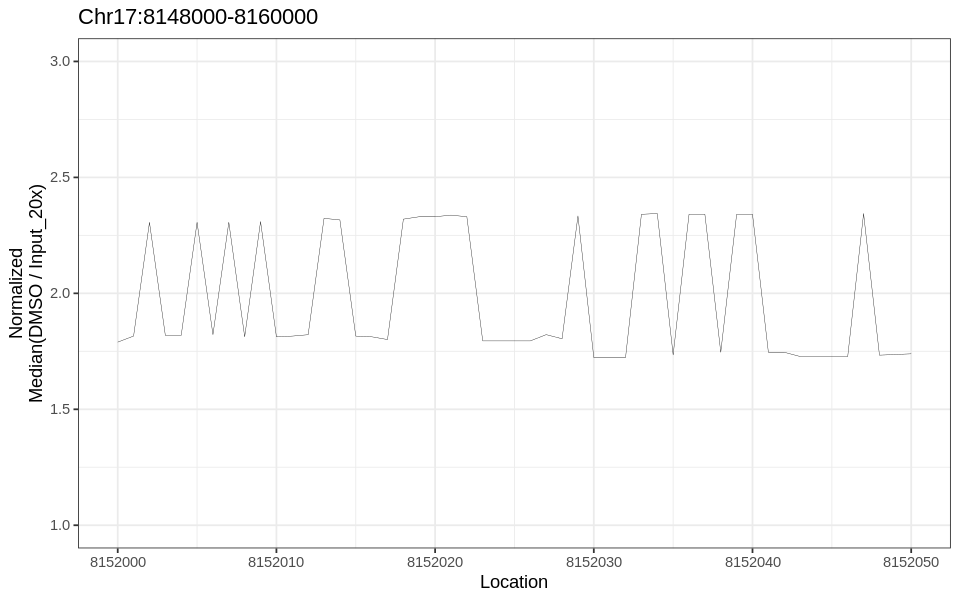

In [88]:
options(repr.plot.height=5, repr.plot.width=8)
gp2 = ggplot(res_dmso_inp20x, aes(x=Loc, y=Median)) + 
    #geom_ribbon(aes(ymin=Q25, ymax=Q75), alpha=0.2) +
    geom_line(size=0.1) +
    #geom_point(size=0.01) + 
    theme_bw() +
    labs(x="Location", y="Normalized\nMedian(DMSO / Input_20x)", title="Chr17:8148000-8160000") +
    xlim(8152000, 8152050) +
    ylim(1, 3)
print(gp2)

In [105]:
gp1 = ggplot(res_dmso_inp, aes(x=Loc, y=Mean)) + 
    geom_ribbon(aes(ymin=Q25, ymax=Q75), alpha=0.2) +
    geom_line(size=0.5) +
    #geom_point(size=0.01) + 
    theme_bw() +
    labs(x="Location", y="Normalized\nMean(DMSO / Input)", title="Chr17:8148000-8160000")

gp2 = ggplot(res_dmso_inp20x, aes(x=Loc, y=Mean)) + 
    geom_ribbon(aes(ymin=Q25, ymax=Q75), alpha=0.2) +
    geom_line(size=0.5) +
    #geom_point(size=0.01) + 
    theme_bw() +
    labs(x="Location", y="Normalized\nMean(DMSO / Input_20x)", title="Chr17:8148000-8160000")

gp3 = ggplot(res_dex_inp, aes(x=Loc, y=Mean)) + 
    geom_ribbon(aes(ymin=Q25, ymax=Q75), alpha=0.2) +
    geom_line(size=0.5) +
    #geom_point(size=0.01) + 
    theme_bw() +
    labs(x="Location", y="Normalized\nMean(Dex / Input)", title="Chr17:8148000-8160000")

gp4 = ggplot(res_dex_inp20x, aes(x=Loc, y=Mean)) + 
    geom_ribbon(aes(ymin=Q25, ymax=Q75), alpha=0.2) +
    geom_line(size=0.5) +
    #geom_point(size=0.01) + 
    theme_bw() +
    labs(x="Location", y="Normalized\nMean(Dex / Input_20x)", title="Chr17:8148000-8160000")

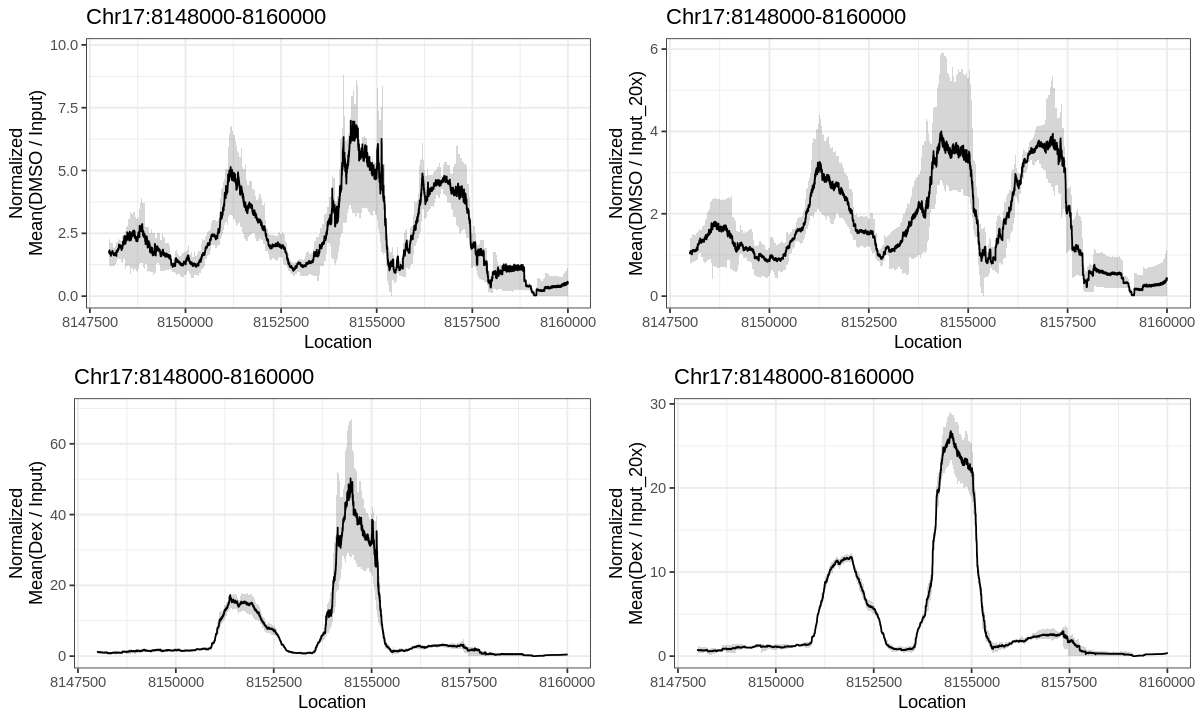

In [106]:
options(repr.plot.height=6, repr.plot.width=10)
grid.arrange(gp1, gp2, gp3, gp4, nrow=2)

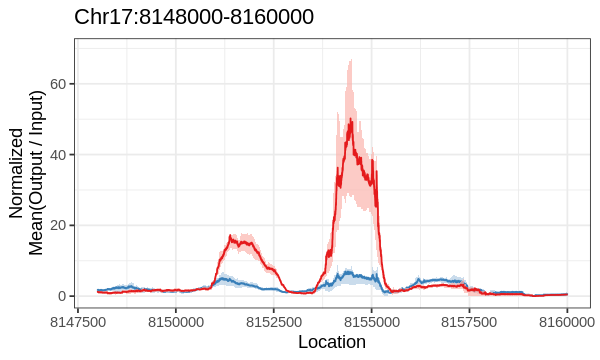

In [113]:
options(repr.plot.height=3, repr.plot.width=5)

gpt = ggplot() + 
    geom_ribbon(data=res_dmso_inp, aes(x=Loc, ymin=Q25, ymax=Q75), fill ="#b3cde3", alpha=0.7) +
    geom_line(  data=res_dmso_inp, aes(x=Loc, y=Mean), size=0.5, color="#377eb8") +
    geom_ribbon(data=res_dex_inp,  aes(x=Loc, ymin=Q25, ymax=Q75), fill ="#fbb4ae", alpha=0.7) +
    geom_line(  data=res_dex_inp,  aes(x=Loc, y=Mean), size=0.5, color="#e41a1c") +
    theme_bw() +
    labs(x="Location", y="Normalized\nMean(Output / Input)", title="Chr17:8148000-8160000")
gpt

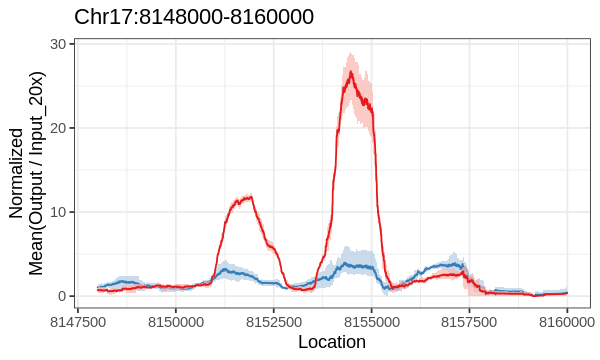

In [114]:
options(repr.plot.height=3, repr.plot.width=5)

gpt = ggplot() + 
    geom_ribbon(data=res_dmso_inp20x, aes(x=Loc, ymin=Q25, ymax=Q75), fill ="#b3cde3", alpha=0.7) +
    geom_line(  data=res_dmso_inp20x, aes(x=Loc, y=Mean), size=0.5, color="#377eb8") +
    geom_ribbon(data=res_dex_inp20x,  aes(x=Loc, ymin=Q25, ymax=Q75), fill ="#fbb4ae", alpha=0.7) +
    geom_line(  data=res_dex_inp20x,  aes(x=Loc, y=Mean), size=0.5, color="#e41a1c") +
    theme_bw() +
    labs(x="Location", y="Normalized\nMean(Output / Input_20x)", title="Chr17:8148000-8160000")
gpt

In [152]:
tmp = data.frame(
    xmin = c(8150900, 8153500, 8155700),
    xmax = c(8153000, 8155500, 8158000))

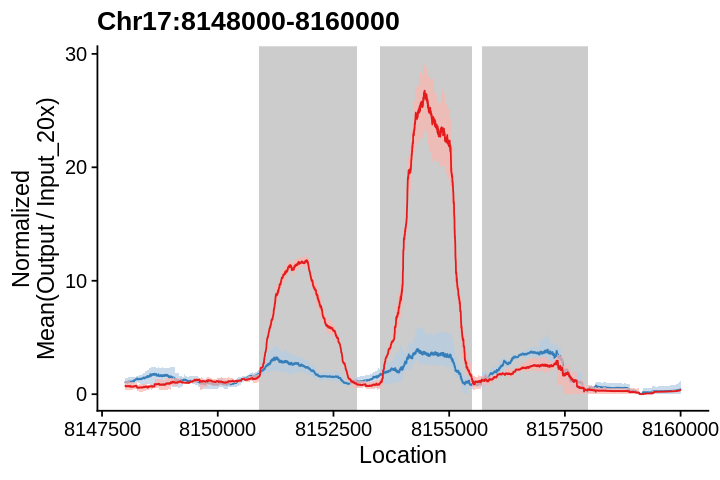

In [153]:
options(repr.plot.height=4, repr.plot.width=6)

gpt = ggplot() + 
    geom_rect(data = tmp, aes(xmin=xmin, xmax=xmax, ymin=-Inf, ymax=Inf), fill='grey80') +
    geom_ribbon(data=res_dmso_inp20x, aes(x=Loc, ymin=Q25, ymax=Q75), fill ="#b3cde3", alpha=0.7) +
    geom_line(  data=res_dmso_inp20x, aes(x=Loc, y=Mean), size=0.5, color="#377eb8") +
    geom_ribbon(data=res_dex_inp20x,  aes(x=Loc, ymin=Q25, ymax=Q75), fill ="#fbb4ae", alpha=0.7) +
    geom_line(  data=res_dex_inp20x,  aes(x=Loc, y=Mean), size=0.5, color="#e41a1c") +
    theme_cowplot() +
    labs(x="Location", y="Normalized\nMean(Output / Input_20x)", title="Chr17:8148000-8160000")
    
gpt

Warning message:
“Removed 10000 row(s) containing missing values (geom_path).”
Warning message:
“Removed 10000 row(s) containing missing values (geom_path).”


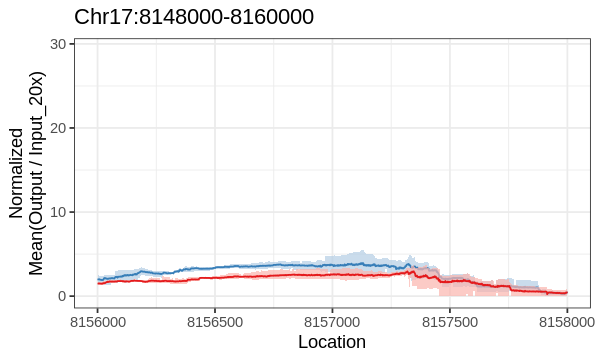

In [149]:
options(repr.plot.height=3, repr.plot.width=5)

gpt = ggplot() + 
    geom_ribbon(data=res_dmso_inp20x, aes(x=Loc, ymin=Q25, ymax=Q75), fill ="#b3cde3", alpha=0.7) +
    geom_line(  data=res_dmso_inp20x, aes(x=Loc, y=Mean), size=0.5, color="#377eb8") +
    geom_ribbon(data=res_dex_inp20x,  aes(x=Loc, ymin=Q25, ymax=Q75), fill ="#fbb4ae", alpha=0.7) +
    geom_line(  data=res_dex_inp20x,  aes(x=Loc, y=Mean), size=0.5, color="#e41a1c") +
    theme_bw() +
    labs(x="Location", y="Normalized\nMean(Output / Input_20x)", title="Chr17:8148000-8160000") +
    xlim(8156000, 8158000)
gpt